# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sentiment_factDEPI.csv
sentiment_fact = pd.read_csv('sentiment_factDEPI.csv')

In [3]:
sentiment_fact.head()

,SentimentID,PostID,UserID,DateID,SentimentScore,SentimentCategory,Date,Month,Quarter,Year,PostContent,Platform,PostDate,Username,Location,FollowerCount,JoinedDate
0,0,0,485,0,0.11,Neutral,2024-04-14 23:14:03.729749,April,2,2024,Sample food ads content 0,Twitter,2023-01-22 23:14:03.729749,user_485,New York,435,2026-01-21 23:14:03.729749
1,1,1,4657,1,-0.40,Positive,2023-03-04 23:14:03.729749,March,1,2023,Sample food ads content 1,Instagram,2024-01-28 23:14:03.729749,user_4657,London,8087,2025-04-14 23:14:03.729749
2,2,2,4483,2,0.72,Negative,2024-08-05 23:14:03.729749,August,3,2024,Sample games content 2,Twitter,2024-03-15 23:14:03.729749,user_4483,Tokyo,8826,2027-03-30 23:14:03.729749
3,3,3,3223,3,0.29,Positive,2024-02-07 23:14:03.729749,February,1,2024,Sample course content 3,Snapchat,2023-09-23 23:14:03.729749,user_3223,Paris,2789,2024-04-27 23:14:03.729749
4,4,4,3654,4,0.29,Negative,2024-01-28 23:14:03.729749,January,1,2024,Sample announcement content 4,Instagram,2024-01-27 23:14:03.729749,user_3654,London,6252,2025-01-29 23:14:03.729749


In [4]:
sentiment_fact.describe()

,SentimentID,PostID,UserID,DateID,SentimentScore,Quarter,Year,FollowerCount
count,10000.00000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,2491.656000,4999.50000,0.001269,2.505100,2023.272800,4990.216200
std,2886.89568,2886.89568,1450.343284,2886.89568,0.580533,1.118347,0.659866,2837.937064
min,0.00000,0.00000,0.000000,0.00000,-1.000000,1.000000,2022.000000,101.000000
25%,2499.75000,2499.75000,1197.000000,2499.75000,-0.500000,2.000000,2023.000000,2498.000000
50%,4999.50000,4999.50000,2465.500000,4999.50000,-0.000000,2.500000,2023.000000,4993.000000
75%,7499.25000,7499.25000,3750.000000,7499.25000,0.510000,4.000000,2024.000000,7411.000000
max,9999.00000,9999.00000,4999.000000,9999.00000,1.000000,4.000000,2024.000000,9998.000000


**Are there missing values ​​in the data?**

In [5]:
sentiment_fact.isnull().sum()

SentimentID          0
PostID               0
UserID               0
DateID               0
SentimentScore       0
SentimentCategory    0
Date                 0
Month                0
Quarter              0
Year                 0
PostContent          0
Platform             0
PostDate             0
Username             0
Location             0
FollowerCount        0
JoinedDate           0
dtype: int64

**What are the platforms within the dataset?**

In [6]:
unique_platform = sentiment_fact['Platform'].nunique()
unique_platform 

5

In [7]:
platform_counts = sentiment_fact['Platform'].value_counts()
platform_counts

Platform
Facebook     2014
TikTok       2013
Twitter      2012
Instagram    1986
Snapchat     1975
Name: count, dtype: int64

**What are the feelings in the posts?**

In [8]:
unique_cat = sentiment_fact['SentimentCategory'].unique()
unique_cat

array(['Neutral', 'Positive', 'Negative'], dtype=object)

###  1. Distribution of Sentiment by Platform (Bar Chart)

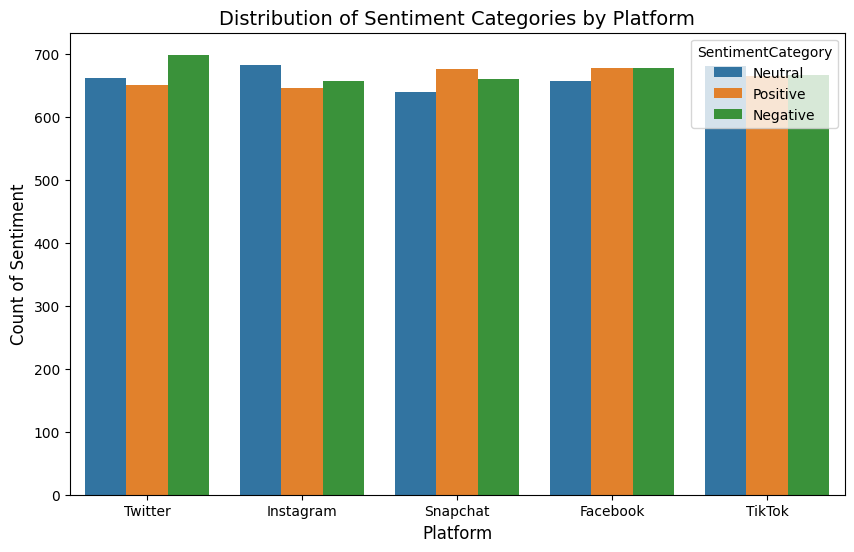

In [7]:
# 1. Distribution of Sentiment by Platform (Bar Chart)
plt.figure(figsize=(10,6))
sns.countplot(data=sentiment_fact, x='Platform', hue='SentimentCategory')
plt.title('Distribution of Sentiment Categories by Platform', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count of Sentiment', fontsize=12)
plt.savefig('sentiment_by_platform.png', format='png', dpi=300)
plt.show()

### 2. Follower Count vs. Sentiment Score (Scatter Plot)

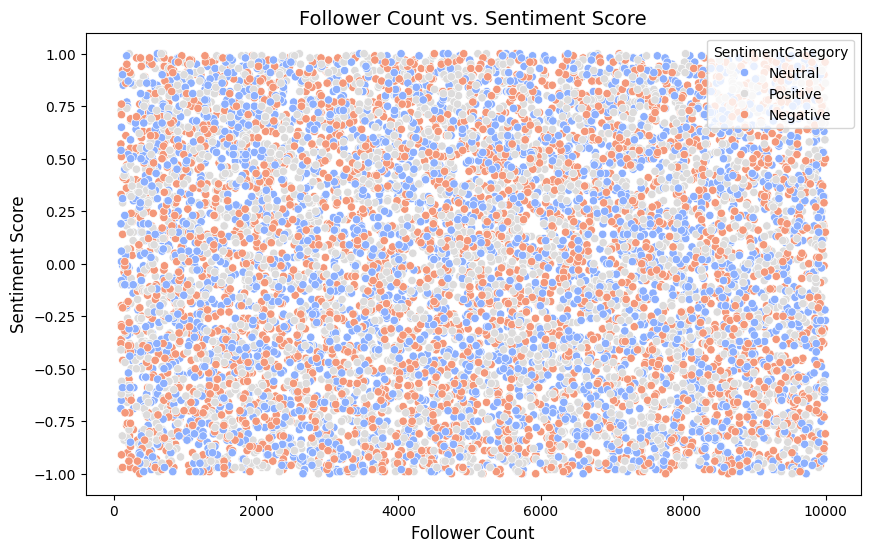

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=sentiment_fact, x='FollowerCount', y='SentimentScore', hue='SentimentCategory', palette='coolwarm')
plt.title('Follower Count vs. Sentiment Score', fontsize=14)
plt.xlabel('Follower Count', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.savefig('follower_sentiment_scatter.png', format='png', dpi=300)
plt.show()

### 3. Sentiment Distribution by Location (Bar Chart)

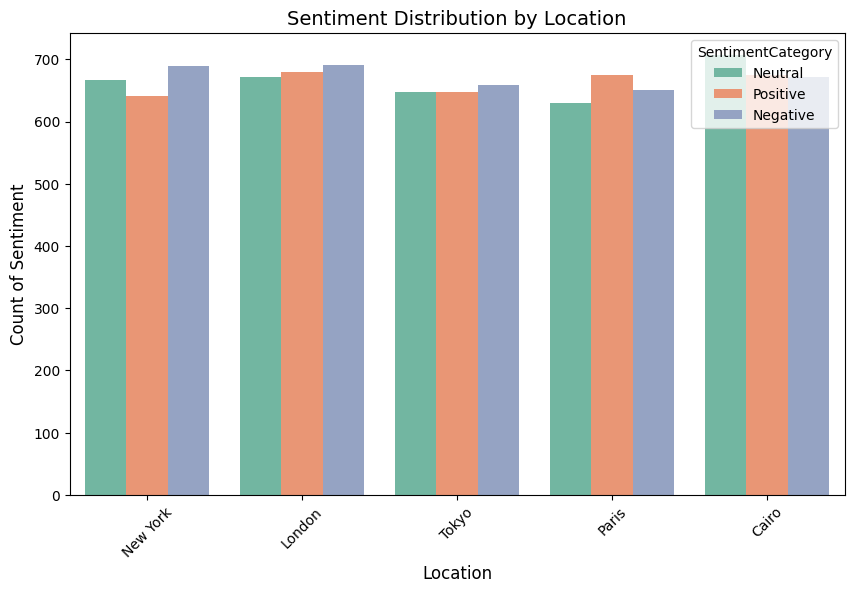

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=sentiment_fact, x='Location', hue='SentimentCategory', palette='Set2')
plt.title('Sentiment Distribution by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count of Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('sentiment_by_location.png', format='png', dpi=300)
plt.show()

### 4. Time-Based Sentiment Trends (Line Plot)

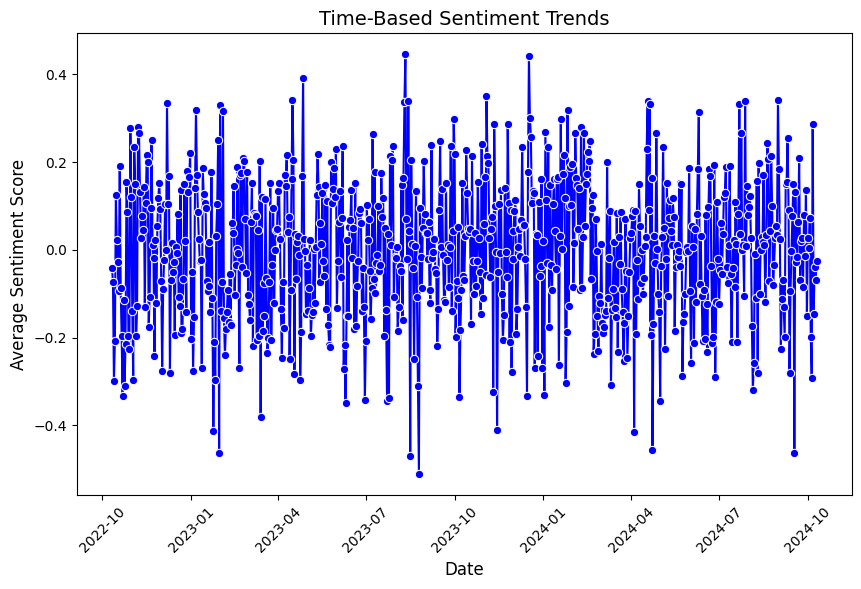

In [6]:
# Convert the 'Date' column to datetime
sentiment_fact['Date'] = pd.to_datetime(sentiment_fact['Date'])
# Grouping by date and calculating mean sentiment score per day
daily_sentiment = sentiment_fact.groupby(sentiment_fact['Date'].dt.date)['SentimentScore'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=daily_sentiment, x='Date', y='SentimentScore', marker='o', color='b')
plt.title('Time-Based Sentiment Trends', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('time_based_sentiment_trends.png', format='png', dpi=300)
plt.show()